In [5]:
# Plot, for each focal genus, the number of present species
# within that genus vs. number of genera
from utils import config, sample_utils as su, parse_midas_data as pmd
from collections import defaultdict
import numpy as np
import bz2

species_avg_relab = {}

# Relative abundance file
relab_fpath = "%s/species/relative_abundance.txt.bz2" % config.data_directory
relab_file = bz2.BZ2File(relab_fpath, 'r')
data = [row.strip().split('\t') for row in relab_file]
samples = su.parse_merged_sample_names(data[0][1:])

# Dictionary: sample -> present genus -> list of present species
present_species = {s: defaultdict(list) for s in samples}

for species_line in data[1:]:
    species = species_line[0]
    genus = species.split('_')[0]
    relabs = species_line[1:]
    for i in range(len(samples)):
        relab = float(relabs[i])
        sample = samples[i]
        if relab != 0:
            present_species[sample][genus].append(species)

In [13]:
num_species = []
num_genera = []

for sample in present_species:
    for genus in present_species[sample]:
        num_species.append(len(present_species[sample][genus]))
        num_genera.append(len(present_species[sample]))

num_species = np.array(num_species)
num_genera = np.array(num_genera)

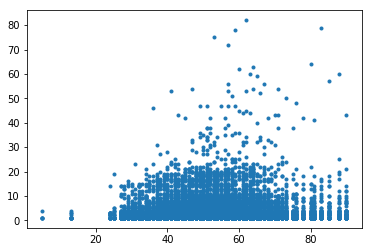

In [12]:
from matplotlib import pyplot as plt
plt.plot(num_genera, num_species, '.')
plt.show()

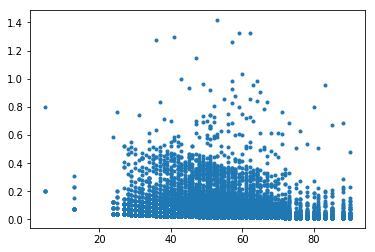

In [15]:
plt.plot(num_genera, num_species/num_genera.astype('float'), '.')
plt.show()